## Final Project OWO (Samantha, Emily, & Steven)

![alt text](https://media.giphy.com/media/JVmYAO3MkGNiM/giphy.gif)

## Abstraction

To retrieve the datas please search here: 
1. https://data.wprdc.org/dataset/police-incident-blotter
2. https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3
3. https://data.wprdc.org/dataset/1984-community-profiles-a-descriptive-picture-of-communities-in-allegheny-county/resource/8e2b239e-4a46-49f9-bd13-2566f3c64d28
4. https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1


## Population – Samantha Lavrinc =u=

The desirability of a location is a strong indicator of which neighborhood is best because when people choose a place to live, they don’t just focus on a single metric. Using this concept of individual responsibility to research new and desirable locations to live, the rate of change in population directly reflects which neighborhoods are considered the best by its residents.

The first two sets of data were used as population comparisons where a set from 1984 is the starting population and the set from 2017 is the comparison set. Using this data, we were able to determine that the top 5 neighborhoods according to population increase by percentage was:

- 1 = Strip District +312(+72%)
- 2 = Bluff +1790(+40%)
- 3 = Central Business District +840(+26%)
- 4 = Troy Hill +463(+25%)
- 5 = North Oakland +894(+10%)


In [24]:
import pandas as pd
import numpy as np

# load data from a downloaded data set
pop2017 = pd.read_csv("2017pop.csv") 
pop1984 = pd.read_csv("1984pop.csv") 


# extract relevant data
pop2017SEL = pop2017.iloc[:,[0,2]] 
pop2017SEL.columns = {'Neighborhood', 'y2017'} # pop2017SEL is the 2017 dataset 

# extract relevant data
pop1984SEL = pop1984.iloc[:, [0,1]]
pop1984SEL.columns = {'Neighborhood', 'y1984'} # pop1984SEL is the 1984 dataset

# 1984 set uses commas, eliminate them for comparable input
pop1984SEL = pop1984SEL.replace(',', '', regex=True)


# combine sets of data
# pop1984SEL (Neighborhood, 1984)
# pop2017SEL (Neighborhood, 2017)
combinedSET = pd.merge(pop1984SEL, pop2017SEL)
# subtract 1984 pop from 2017 pop 
# must be converted to float
combinedSET['Change'] = combinedSET['y2017'].astype(float) - combinedSET['y1984'].astype(float)

# allows the entire list to be shown by call to print()
pd.set_option('display.max_rows', None)

# For each of these neighborhoods, we can expect a decrease of 13.2%, but any higher of a 
# decrease would mean these neighborhoods rate very low on the desirability scale.
# Let's find those percentages:

combinedSET['perc'] = combinedSET['Change'].astype(float) / combinedSET['y1984'].astype(float)
combinedSET = combinedSET.sort_values(by='perc', ascending = False)
combinedSET.head()

,Neighborhood,y1984,y2017,Change,perc
73,Strip District,435,747,312.0,0.717241
10,Bluff,4504,6294,1790.0,0.397425
16,Central Business District,3220,4060,840.0,0.260870
77,Troy Hill,1820,2283,463.0,0.254396
50,North Oakland,8708,9602,894.0,0.102664


![](contenderListout.png)
![alt text](https://media.giphy.com/media/UTj6uNKzYFmJGbKdgH/giphy.gif)

The second set of data is from a wider range of neighborhoods and includes where people moved to as they decided to move away from the city.

The resulting neighborhoods had the greatest increase in population across all of Allegheny County:

1. Pine Township +6715 
2. Marshall Township +5759 
3. South Fayette +5718 
4. S. West Deer +5430 
5. S. Robinson Township +4986

In [25]:
# only extract certain columns
tractDATA = pd.read_csv("tractdata.csv")
tractDATA = tractDATA.iloc[:,[3, 5, 12, 14]] 

# new column  = change in population
tractDATA['Change'] = tractDATA['POP10'].astype(float) - tractDATA['POP00'].astype(float)

# remove tracts which haven't changed, or have declined in population
tractDATA = tractDATA[tractDATA['Change'] > 0]

# there were a few duplicates which only differed in columns that aren't important to 
# our goal -
tractDATA = tractDATA.drop_duplicates(subset=['POP10'], keep='first')

# sort by highest population
tractDATA = tractDATA.sort_values(by='POP10', ascending = False)

tractDATA.reset_index(inplace = True, drop = True)

tractDATA.head(18)

,TRACT00,POP00,TRACT10,POP10,Change
0,408001,4782,409000,11497,6715.0
1,411000,6938,412001,8605,1667.0
2,401100,4467,912700,7307,2840.0
3,450700,3132,451300,7133,4001.0
4,456001,3511,458000,7080,3569.0
5,408002,6325,414102,7040,715.0
6,459201,5780,453004,6955,1175.0
7,410000,1156,411000,6915,5759.0
8,419000,2962,526101,6902,3940.0
9,40900,2969,10300,6600,3631.0


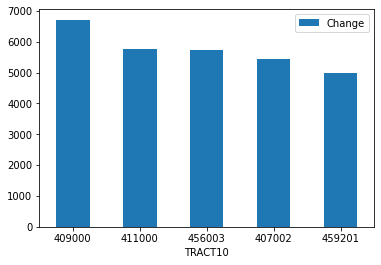

In [26]:
tractDATA = tractDATA.sort_values(by='Change', ascending = False)

tractDATA1 = tractDATA.head(5)
plot1 = tractDATA1.plot.bar(x='TRACT10', y='Change', rot=0)

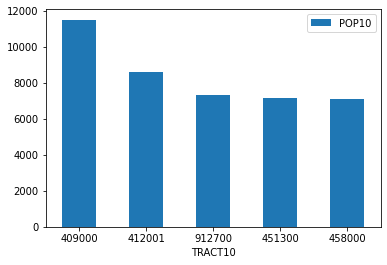

In [27]:
tractDATApop = tractDATA.sort_values(by='POP10', ascending = False)

tractDATA1pop = tractDATApop.head(5)
plot2 = tractDATA1pop.plot.bar(x='TRACT10', y='POP10', rot=0)

![](popincrease.png)
## Covid-19 Pandemic UwU (Emily)

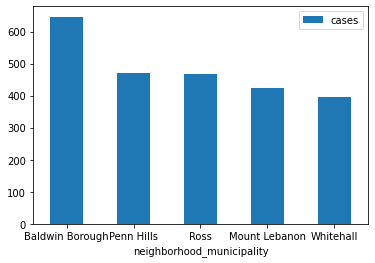

In [28]:
import pandas as pd
#import the downloaded file
covidOut = pd.read_csv("covid.csv")
#use only the rows and colums that are needed to show the result wanted
covidAmount = covidOut.iloc[:,[0,2]] 
#this sorts the cases column to show the greatest number to the least number
covidAmount = covidAmount.sort_values(by='cases', ascending = False)
#this gives the first 5 neighborhoods that have the greatest amount of covid cases
covidAmount = covidAmount.head(5)
#this helps set up the bar graph with the neighborhoods as the x-axis and the number of cases as the y
plot1=covidAmount.plot.bar(x='neighborhood_municipality', y='cases', rot=0)

Through this dataset, you can see who has the greatest amount of covid cases throughout all the neighborhoods. This graph is important and logical to the reasoning of what community to live in because it shows where you can have a greater chance of catching covid and where it is unsafe to live due to the large amounts of interaction your could have with people that might have caught covid.

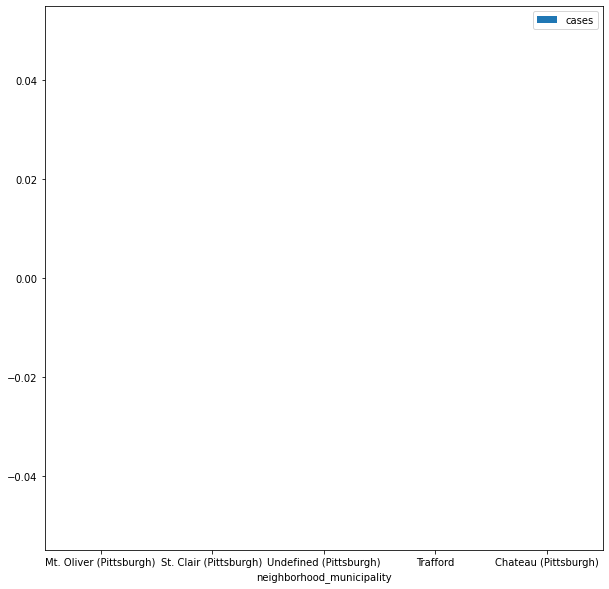

In [29]:
#import the downloaded file
covidOut = pd.read_csv("covid.csv")
#use only the rows and colums that are needed to show the result wanted
covidAmount = covidOut.iloc[:,[0,2]] 
#this sorts the cases column to show the least amount to the highest amount
covidAmount = covidAmount.sort_values(by='cases')
#this gives the first 5 neighborhoods that have the least amount of covid cases
covidAmount = covidAmount.head(5)
#this helps set up the bar graph with the neighborhoods as the x-axis and the number of cases as the y
plot1=covidAmount.plot.bar(x='neighborhood_municipality', y='cases', figsize=(10, 10), rot=0)


### Nursing Homes
In the history of covid, it has been recorded that nursing homes were hit hte hardest with covid, killing millions of elders with the start of one case running throughout the whole building. This might change the idea of how many cases were truly in that area because the nursing home patients would not leave, but maybe the workers inside would catch it, bringing it back to the community in which they live in. There is no data set to show who has the highest amout of nursing homes in the area, but according to some research, according to the department of health in Pennsylvania:

Allegheny County Data


110 nursing home facilities 

1741 patients with covid

611 worker cases

328 deaths

This data shows that there were 611 workers, all from different communities that could have easily spread the disease around their area because maybe they did not realize at first or maybe they never had strong symptoms. This could easily cause a spread in a neighborhood without someone even realizing, showing how not all data is truly accurate due to the multiple factors that can apply to them

After viewing the second graph, it can be concluded that these are the top 5 safest communities to live in based on the amount of covid cases:

1. Mt. Oliver (Pittsburgh)

2. St. Clair (Pittsburgh)

3. Undefined (Pittsburgh)

4. Trafford 

5. Chateau (Pittsburgh)

![alt text](https://media.giphy.com/media/WOkuHrhNv4LQVeSoik/giphy.gif)


## Crime in Pittsburgh >.< (Steven)

One of the main determining factor when thinking the best neighborhood is to safety. Having a safe location is important for families as a mean to protect their children as much as possible from these people:

![alt text](https://media.giphy.com/media/8EQnmihngXilq/giphy.gif)

## Most Amount of Cases

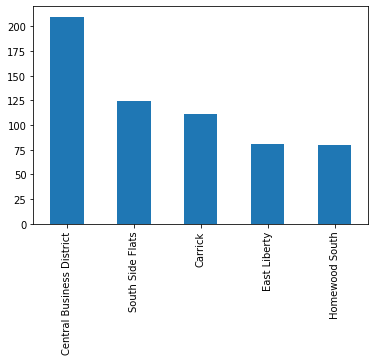

In [30]:
import pandas as pd
import numpy as np
#this reads in the crime data from october to early november
bacon= pd.read_csv("Coconut.csv")
#this counts the amount of time a place has an incident
cheese=bacon['INCIDENTNEIGHBORHOOD'].value_counts()
#this orders the neighborhood from most to least amount of crime
cheese.sort_values(ascending=False)
#plot of the bar graph for most crime
cheese.head().plot(kind='bar')

## Least Amount of cases

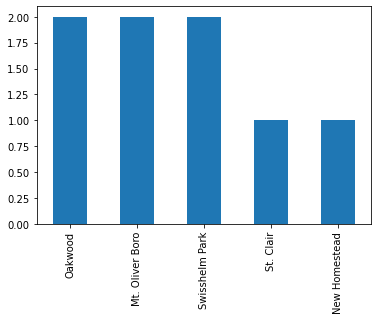

In [31]:
#plot of the bar graph for least crime
cheese.tail().plot(kind='bar')

## An Overview on the map

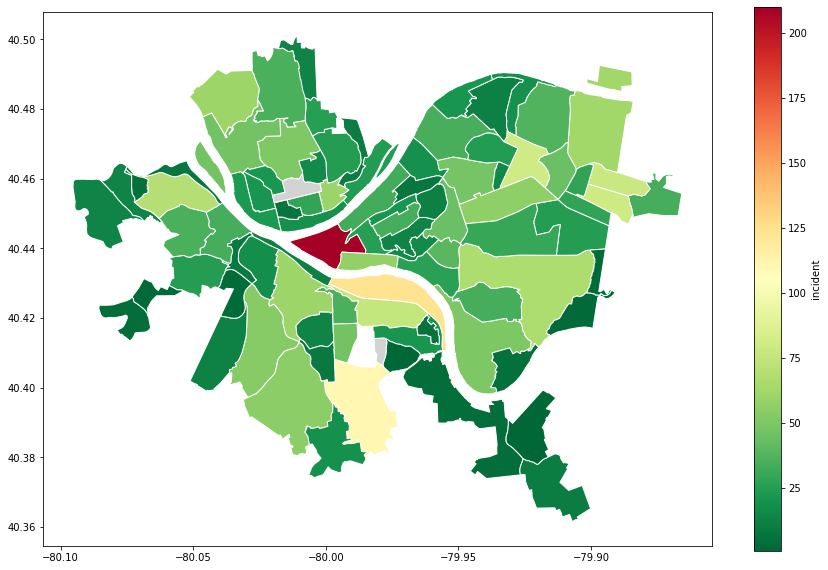

In [32]:
import geopandas
%matplotlib inline
#each incident is one event 
bacon['incident']=1
#this shows the amount of crimes that occured in each incident
hmm=bacon.groupby('INCIDENTNEIGHBORHOOD').sum()
#this plot the graph 
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
crime_map = neighborhoods.merge(hmm, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
crime_map.plot(column='incident', cmap='RdYlGn_r', edgecolor="white", legend=True, 
               legend_kwds={'label':"incident"},figsize=(15, 10), missing_kwds={"color": "lightgrey"} )


## However that doesn't account for the population of the nieghborhood

While the amount of crimes that occurs in the area does determine one's decision of moving in an area. However, these datas didn't account for the population in the area.

In [33]:
#this shows the chart of the population
pop2017 = pd.read_csv("2017pop.csv") 
pop2017.head(15)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411,196.000000
1,Allegheny West,2,343,96.000000
2,Allentown,3,2558,449.773276
3,Arlington,4,1852,348.188168
4,Arlington Heights,5,272,126.000000
5,Banksville,6,3858,581.107563
6,Bedford Dwellings,7,1349,180.000000
7,Beechview,8,8078,719.658252
8,Beltzhoover,9,1702,343.072879
9,Bloomfield,10,8669,491.348145


                 Neighborhood  crime_population
21                    Chateau          0.130435
71                South Shore          1.000000
57                North Shore         10.789474
16  Central Business District         19.333333
80             Strip District         22.636364
87                   West End         26.111111
41             Homewood South         28.450000
42              Homewood West         30.357143
25             East Allegheny         34.916667
44                    Larimer         36.466667
14       California-Kirkbride         36.500000
30                     Esplen         38.625000
40             Homewood North         43.217949
4           Arlington Heights         45.333333
0            Allegheny Center         48.655172
1              Allegheny West         49.000000
72           South Side Flats         50.741935
50                Middle Hill         51.764706
58          Northview Heights         59.423077
73          South Side Slopes         60

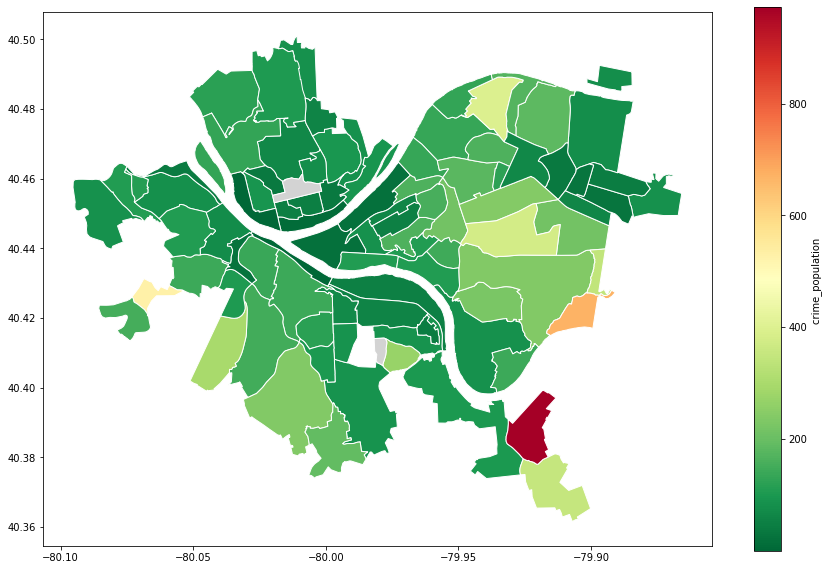

In [34]:
pop2017 = pd.read_csv("2017pop.csv") 
#this merge the two charts and fine the population to crime ratio
crime_map2 = pop2017.merge(hmm, how='left', left_on='Neighborhood', right_on='INCIDENTNEIGHBORHOOD')
crime_map2['crime_population']=(crime_map2['Estimate; Total']/(crime_map2['incident']))
#this shows the data where crimes is the msot prevalent.
crime_map2 =crime_map2.sort_values('crime_population',ascending=True)
print(crime_map2.loc[:,['Neighborhood','crime_population']].head(20))
#this prints a map that shows the crime rate based off of population to crime ratio on the map
stuff = neighborhoods.merge(crime_map2, how='left', left_on='hood', right_on='Neighborhood')
stuff.plot(column='crime_population', cmap='RdYlGn_r', edgecolor="white", legend=True, 
    legend_kwds={'label':"crime_population "},figsize=(15, 10), missing_kwds={"color": "lightgrey"} )

## Top 5 place based off of Population to crime data

1. Chateau
2. South Shore
3. North Shore
4. Central Business District
5. Strip District

If one consider the crime rate in the area, it is easy to tell why more people are deciding to move to these expesnive areas such as Central Business District, Strip District, and East Allegheny than an inexpensive area as it provides more safety for their children.  However, crime doesn't tell the whole story in an area. Some other factors may impacts a person decision from selecting one place over another such as education, opportunites, and the pollution within that location. 

![alt text](https://media.giphy.com/media/1QpgUq9U5jQOs/giphy.gif)

## Conclusion

Top 2: Strip District and Central Business District

## Question???
![alt text](https://media.giphy.com/media/naiatn5LxTOsU/giphy.gif)


Enjoy your day